## Exploratory data analysis and Pre processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder

In [2]:
# Number of rows and colums in the dataset 
dataset = pd.read_csv('../dataset/dataset.csv')
r,c = dataset.shape
print("rows: " + str(r) + " cols: " + str(c))

rows: 11112 cols: 23


In [3]:
# Descriptive Statistics
dataset.describe()

,search,added to cart,removed from cart,begin checkout,session,views,event count,event count per user,events per session,conversion,user engagement,engaged session,engagement rate
count,11112.000000,11112.000000,11112.000000,11112.000000,11112.000000,11112.000000,11021.000000,11021.000000,11112.000000,11112.000000,11021.000000,11112.000000,11112.000000
mean,4.516199,2.536987,1.262599,0.414417,1.488031,2.058225,2.342044,2.342044,1.576060,0.454194,1.977225,1.275288,0.939334
std,2.883997,1.724181,1.396788,0.492643,1.381910,2.972398,3.286320,3.286320,1.577646,0.497920,1.920878,0.933814,0.167834
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.125000
25%,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,7.000000,4.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.666667,1.000000,2.000000,1.000000,1.000000
max,9.000000,5.000000,5.000000,1.000000,26.000000,133.000000,51.000000,51.000000,51.000000,1.000000,35.000000,23.000000,1.000000


In [4]:
# Column modes
modes = dataset[['session default channel grouping','event name','operating systems','screen resolution',
                  'Browser','page path','country','city','day of week','device category']].mode()
modes

,session default channel grouping,event name,operating systems,screen resolution,Browser,page path,country,city,day of week,device category
0,organic search,page_view,android,1366x768,Chrome,/,Nigeria,Lagos,Friday,mobile


In [5]:
# Drop duplicate column event count
dataset.drop('event count',axis=1, inplace=True)
dataset.head()

,session default channel grouping,event name,operating systems,screen resolution,search,added to cart,removed from cart,begin checkout,Browser,page path,...,day of week,device category,session,views,event count per user,events per session,conversion,user engagement,engaged session,engagement rate
0,referral,page_view,android,360x820,5,4,0,0,Chrome,/dashboard,...,Saturday,mobile,26,133,44.333333,5.115385,1,26.0,23,0.884615
1,referral,page_view,android,360x800,9,1,1,0,Chrome,/dashboard,...,Monday,mobile,22,102,34.000000,4.636364,0,21.0,18,0.818182
2,referral,page_view,android,360x820,6,4,1,0,Chrome,/dashboard,...,Sunday,mobile,10,86,43.000000,8.600000,1,21.0,9,0.900000
3,referral,page_view,android,360x800,8,3,0,0,Chrome,/dashboard,...,Saturday,mobile,19,81,27.000000,4.263158,1,17.0,3,0.157895
4,referral,page_view,android,360x820,3,3,3,1,Chrome,/dashboard,...,Wednesday,mobile,21,68,22.666667,3.238095,1,16.0,21,1.000000


In [6]:
# Check for missing values
null_values = dataset.isnull().sum()
null_values.sum()

541

In [7]:
# Drop rows with missing values in specified columns
columns_to_check = ['session default channel grouping', 'city', 'event count per user', 'user engagement']
dataset.dropna(subset=columns_to_check, inplace=True)

r , c = dataset.shape
print(f'Rows {r} Columns {c}')

Rows 10678 Columns 22


In [8]:
# Count the number of outliers in the numeric column using z-score

# identify numerical columns
numerical_columns = dataset.select_dtypes(include=[np.number]).columns

# detect outliers using z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = (data - np.mean(data)) / np.std(data)
    outliers = np.where(np.abs(z_scores) > threshold)[0]
    return len(outliers)

# count outliers in each numerical column
outliers_count = {}
for column in numerical_columns:
    outliers_count[column] = detect_outliers_zscore(dataset[column])

# print the number of outliers
for column, count in outliers_count.items():
    print("Number of outliers in", column, ":", count)

Number of outliers in search : 0
Number of outliers in added to cart : 0
Number of outliers in removed from cart : 0
Number of outliers in begin checkout : 0
Number of outliers in session : 240
Number of outliers in views : 78
Number of outliers in event count per user : 229
Number of outliers in events per session : 216
Number of outliers in conversion : 0
Number of outliers in user engagement : 259
Number of outliers in engaged session : 167
Number of outliers in engagement rate : 276


In [9]:
# Summary statistics before Winsorization

print("Summary Statistics BEFORE Winsorization:")
dataset[numerical_columns].describe()


Summary Statistics BEFORE Winsorization:


,search,added to cart,removed from cart,begin checkout,session,views,event count per user,events per session,conversion,user engagement,engaged session,engagement rate
count,10678.000000,10678.000000,10678.000000,10678.000000,10678.000000,10678.000000,10678.000000,10678.000000,10678.000000,10678.000000,10678.000000,10678.000000
mean,4.511425,2.535400,1.262034,0.414591,1.504308,2.071736,2.372105,1.587783,0.460199,1.995692,1.284885,0.937742
std,2.883750,1.723679,1.396380,0.492674,1.405754,3.025431,3.329952,1.599508,0.498437,1.943421,0.950463,0.169779
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.125000
25%,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
50%,4.000000,3.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,7.000000,4.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.666667,1.000000,2.000000,1.000000,1.000000
max,9.000000,5.000000,5.000000,1.000000,26.000000,133.000000,51.000000,51.000000,1.000000,35.000000,23.000000,1.000000


In [10]:
# Columns to apply Winsorization (numeric columns)
numeric_columns = ['search', 'added to cart', 'removed from cart', 'begin checkout', 
                   'session', 'views', 'event count per user', 'events per session', 
                   'conversion', 'user engagement', 'engaged session', 'engagement rate']

# Winsorize each numeric column at the 95th percentile
for column in numeric_columns:
    dataset[column] = winsorize(dataset[column], limits=(0.05, 0.05))


In [11]:
# Summary statistics before Winsorization
print("Summary Statistics BEFORE Winsorization:")
dataset[numerical_columns].describe()


Summary Statistics BEFORE Winsorization:


,search,added to cart,removed from cart,begin checkout,session,views,event count per user,events per session,conversion,user engagement,engaged session,engagement rate
count,10678.000000,10678.000000,10678.000000,10678.000000,10678.000000,10678.000000,10678.000000,10678.000000,10678.000000,10678.000000,10678.000000,10678.000000
mean,4.511425,2.535400,1.231504,0.414591,1.387245,1.860648,2.075873,1.446810,0.460199,1.821221,1.212961,0.942806
std,2.883750,1.723679,1.323335,0.492674,0.807253,0.947070,1.929705,0.845693,0.498437,1.245605,0.534624,0.152550
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.500000
25%,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
50%,4.000000,3.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,7.000000,4.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.666667,1.000000,2.000000,1.000000,1.000000
max,9.000000,5.000000,4.000000,1.000000,4.000000,4.000000,8.000000,4.000000,1.000000,5.000000,3.000000,1.000000


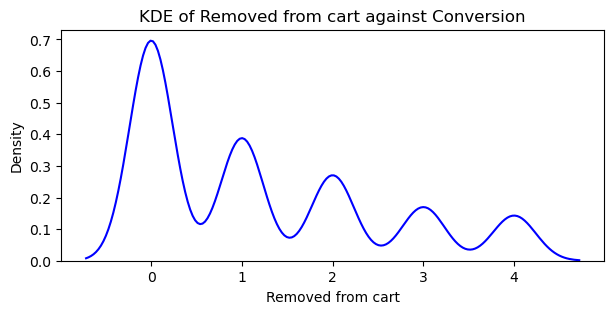

In [12]:
# KDE Removed from cart

plt.figure(figsize=(7, 3))

# Using 'blue' for both plots, but you can choose any color you prefer
# sns.kdeplot(data=pre_df[pre_df['conversion'] == 0]['removed from cart'], color='blue', fill=True)
sns.kdeplot(data=dataset[dataset['conversion'] == 1]['removed from cart'], color='blue', fill=False)

plt.xlabel('Removed from cart')
plt.ylabel('Density')
plt.title('KDE of Removed from cart against Conversion')
plt.show()


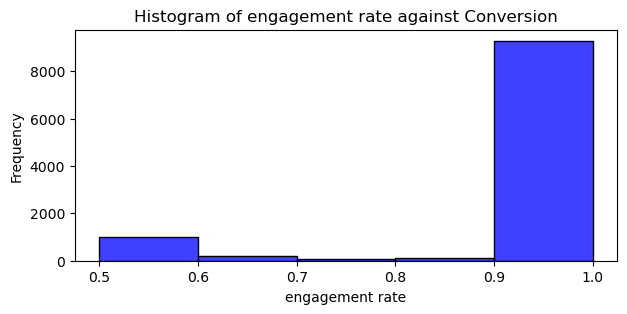

In [13]:
# Plot the histogram against the target variable
plt.figure(figsize=(7, 3))
sns.histplot(data=dataset, x='engagement rate', color = "blue", bins=5)
plt.xlabel('engagement rate')
plt.ylabel('Frequency') 
plt.title('Histogram of engagement rate against Conversion')
plt.show()

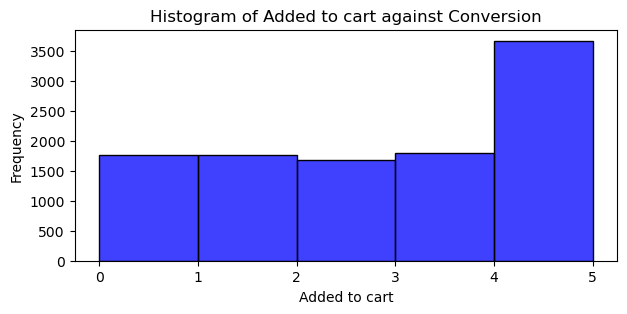

In [14]:
# Plot the histogram against the target variable
plt.figure(figsize=(7, 3))
sns.histplot(data=dataset, x='added to cart', bins=5, color='blue') # You can change 'blue' to your preferred color
plt.xlabel('Added to cart')
plt.ylabel('Frequency') 
plt.title('Histogram of Added to cart against Conversion')
plt.show()


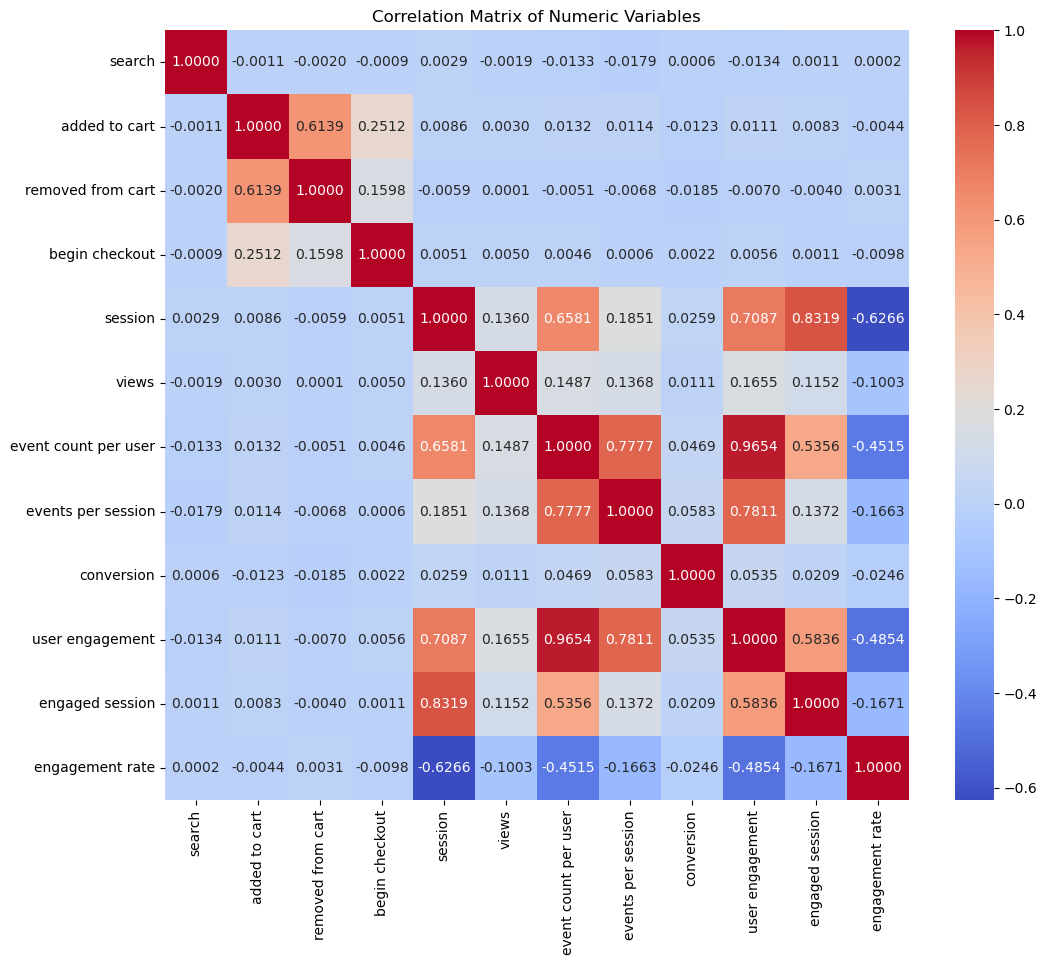

In [15]:
# first temporarily convert target variable to 0 and 1
df = dataset

values = df['conversion'].unique()

# a lambda function to make target variable into numerical variables
# df['conversion'] = df['conversion'].map(lambda x: 0 if x == values[0] else 1)


# CORRELATION OF ALL NUMERICAL VARIABLES
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


In [16]:
# Convert 1s to True and 0s to False in the 'column_name' column
dataset['conversion'] = dataset['conversion'].replace({1: True, 0: False})

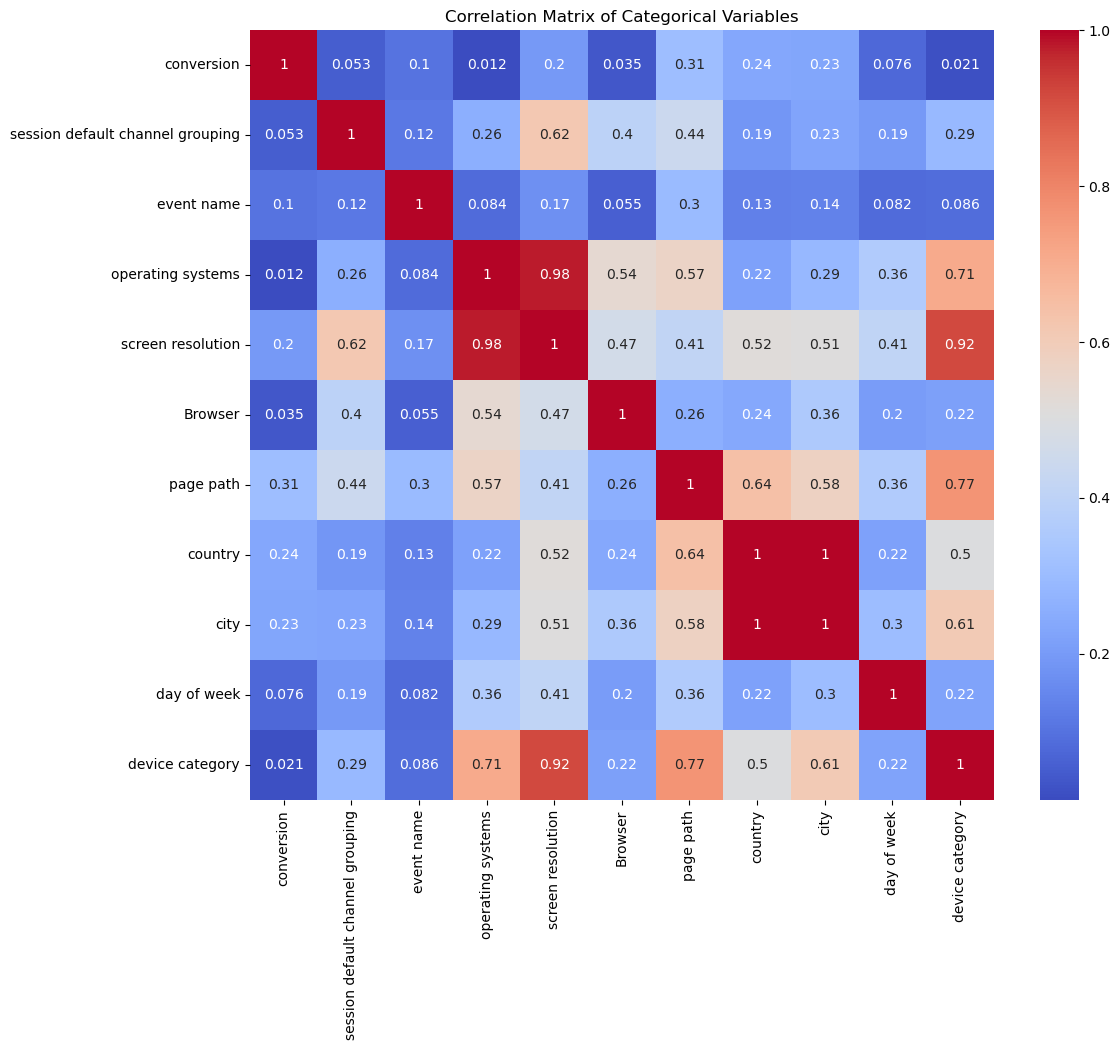

In [17]:
# CORRELATION OF CATEGORICAL VARIABLES USING CRAMER'S V

# list of all categorical variables in the dataset
categorical_columns = ['conversion','session default channel grouping', 'event name','operating systems',
                      'screen resolution','Browser','page path', 'country', 'city', 
                       'day of week', 'device category'] 

df_categorical = dataset[categorical_columns]

# encode categorical variables as numerical values
label_encoder = LabelEncoder()
df_encoded = df_categorical.apply(label_encoder.fit_transform)
# df_encoded

# calculate the correlation matrix using Cramér's V
def cramers_v(x, y):
    # creates a confusion matrix by cross tabulating the two input variables
    confusion_matrix = pd.crosstab(x, y) 
    # calculates the chi-square stat for the confusion matrix
    chi2 = chi2_contingency(confusion_matrix)[0]
    # total number of observation by suming the values of the confusion matrix
    n = confusion_matrix.sum().sum()
    # uncorrected phi-square value
    phi2 = chi2 / n
    # num of rows and columns in the confusion matrix
    r, k = confusion_matrix.shape
    # this is the corrected phi-square value
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    # corrected num of rows and columns respectively
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    # returns square-root of the ratio of the corrected phi-squared value
    # which measures the strength of association between the categorical 
    # variables x and y
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

try:
    # creates an empty DataFrame called correlation_matrix with the same column names as df_encoded
    correlation_matrix = pd.DataFrame(index=df_encoded.columns, columns=df_encoded.columns)
    
    # i and j represents the columns name
    for i in df_encoded.columns:
        for j in df_encoded.columns:
            correlation_matrix.loc[i, j] = cramers_v(df_encoded[i], df_encoded[j])

    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Categorical Variables')
    plt.show()

except Exception as e:
    print("Error:", e)


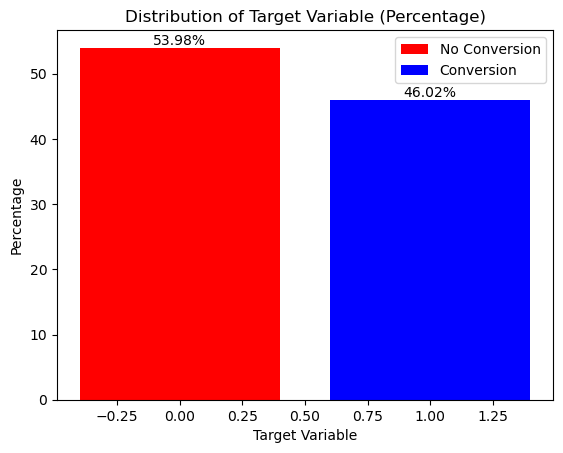

In [18]:

# Count the occurrences of each unique value in the target variable
target_counts = df['conversion'].value_counts()

# Sort the target counts (optional, but it will give you a sorted bar chart)
target_counts = target_counts.sort_index()

# Calculate the total number of occurrences (sum of all counts)
total_occurrences = target_counts.sum()

# Calculate the percentage for each value
target_percentage = (target_counts / total_occurrences) * 100

# Define colors and labels for each target variable value
colors = ['red', 'blue']
labels = ['No Conversion','Conversion']

# Create a bar chart with percentages, using different colors and labels
plt.bar(target_percentage.index, target_percentage.values, color=colors, label=labels)

# Add labels and title
plt.xlabel('Target Variable')
plt.ylabel('Percentage')
plt.title('Distribution of Target Variable (Percentage)')

# Add percentage values as annotations on each bar
for i, value in enumerate(target_percentage.values):
    plt.text(target_percentage.index[i], value + 0.5, f'{value:.2f}%', ha='center')

# Show the legend
plt.legend()

# Show the bar chart
plt.show()


In [19]:
# change the days columns to numeric
numeric_days = {
    'Sunday' : 1, 
    'Monday' : 2, 
    'Tuesday' : 3, 
    'Wednesday' : 4, 
    'Thursday' : 5,
    'Friday' : 6, 
    'Saturday': 7
}
dataset['day of week'] = dataset['day of week'].map(numeric_days)
dataset.head(2)

,session default channel grouping,event name,operating systems,screen resolution,search,added to cart,removed from cart,begin checkout,Browser,page path,...,day of week,device category,session,views,event count per user,events per session,conversion,user engagement,engaged session,engagement rate
0,referral,page_view,android,360x820,5,4,0,0,Chrome,/dashboard,...,7,mobile,4,4,8.0,4.0,True,5.0,3,0.884615
1,referral,page_view,android,360x800,9,1,1,0,Chrome,/dashboard,...,2,mobile,4,4,8.0,4.0,False,5.0,3,0.818182


In [20]:
# split the screen resolution column
dataset[['screen_width', 'screen_height']] = dataset['screen resolution'].str.split('x', n=1, expand=True)

# Drop the screen resolution, page path and city column
dataset.drop(['screen resolution'], axis=1, inplace=True)

dataset.head(1)

,session default channel grouping,event name,operating systems,search,added to cart,removed from cart,begin checkout,Browser,page path,country,...,session,views,event count per user,events per session,conversion,user engagement,engaged session,engagement rate,screen_width,screen_height
0,referral,page_view,android,5,4,0,0,Chrome,/dashboard,Nigeria,...,4,4,8.0,4.0,True,5.0,3,0.884615,360,820


In [21]:
# Apply one hot encoding to non numeric variables 
df_columns = ['session default channel grouping','operating systems']

# encode the columns
encode_df = pd.get_dummies(dataset[df_columns])

# drop the original columns 
dataset.drop(df_columns, axis=1, inplace=True)

# concantenate both dataframes
dataset  = pd.concat([dataset, encode_df], axis=1)

dataset.head(2)

,event name,search,added to cart,removed from cart,begin checkout,Browser,page path,country,city,day of week,...,screen_width,screen_height,session default channel grouping_direct,session default channel grouping_organic search,session default channel grouping_organic social,session default channel grouping_referral,operating systems_android,operating systems_iOS,operating systems_macintosh,operating systems_windows
0,page_view,5,4,0,0,Chrome,/dashboard,Nigeria,Lagos,7,...,360,820,0,0,0,1,1,0,0,0
1,page_view,9,1,1,0,Chrome,/dashboard,Nigeria,Lagos,2,...,360,800,0,0,0,1,1,0,0,0


In [22]:
# show columns names 
col_names = dataset.columns.tolist()
col_names

['event name',
 'search',
 'added to cart',
 'removed from cart',
 'begin checkout',
 'Browser',
 'page path',
 'country',
 'city',
 'day of week',
 'device category',
 'session',
 'views',
 'event count per user',
 'events per session',
 'conversion',
 'user engagement',
 'engaged session',
 'engagement rate',
 'screen_width',
 'screen_height',
 'session default channel grouping_direct',
 'session default channel grouping_organic search',
 'session default channel grouping_organic social',
 'session default channel grouping_referral',
 'operating systems_android',
 'operating systems_iOS',
 'operating systems_macintosh',
 'operating systems_windows']

In [23]:
# Rename columns of datframe 

# convert all columns to lowercase
dataset.columns = dataset.columns.str.lower()

# Replace specific part of each column name
dataset.columns = dataset.columns.str.replace(' ', '_')  
dataset.columns = dataset.columns.str.replace('Browser_', '') 
dataset.columns = dataset.columns.str.replace('Browser_', '') 
dataset.columns = dataset.columns.str.replace('Browser_', '') 
dataset.columns = dataset.columns.str.replace('event_name_', '') 
dataset.columns = dataset.columns.str.replace('operating_systems_', '') 
dataset.columns = dataset.columns.str.replace('device_category_', '') 
dataset.columns = dataset.columns.str.replace('session_default_channel_grouping_', '')

In [24]:
# Apply lable encoding to the remaining categorical columns 

encode_columns = ['event_name','browser','device_category','city', 'page_path']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for column in encode_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])
    
dataset.head(2)

,event_name,search,added_to_cart,removed_from_cart,begin_checkout,browser,page_path,country,city,day_of_week,...,screen_width,screen_height,direct,organic_search,organic_social,referral,android,ios,macintosh,windows
0,4,5,4,0,0,1,21,Nigeria,29,7,...,360,820,0,0,0,1,1,0,0,0
1,4,9,1,1,0,1,21,Nigeria,29,2,...,360,800,0,0,0,1,1,0,0,0


In [25]:
# convert string value to numeric
dataset['user_engagement'] = dataset['user_engagement'].astype(float)


In [26]:
dataset.rename(columns={'conversion': 'signup'}, inplace=True)
# Drop the screen resolution, page path and city column
dataset.drop(['country'], axis=1, inplace=True)

# List of columns
col_names = dataset.columns.tolist()
col_names

['event_name',
 'search',
 'added_to_cart',
 'removed_from_cart',
 'begin_checkout',
 'browser',
 'page_path',
 'city',
 'day_of_week',
 'device_category',
 'session',
 'views',
 'event_count_per_user',
 'events_per_session',
 'signup',
 'user_engagement',
 'engaged_session',
 'engagement_rate',
 'screen_width',
 'screen_height',
 'direct',
 'organic_search',
 'organic_social',
 'referral',
 'android',
 'ios',
 'macintosh',
 'windows']

In [27]:
# verify number of rows and columns in the dataset 
r, c = dataset.shape
print("Number of rows:", r)
print("Number of columns:", c)

Number of rows: 10678
Number of columns: 28


In [28]:
dataset.to_csv('../dataset/m_dataset.csv', index=False)